In [ ]:
- Schön machen
- Text schreiben
- ML modell
- Daten vorbereiten

# Outline

- Research Questions:
    - q1
    - q2
    - q3
    
- Research on Data:
    - Preparation
    - Analysis
    - Modeling
    - Visualization

CRISP-DM
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

In [1]:
# The code uses comments effectively and/or Notebook Markdown cells correctly.
# The steps of the data science process (gather, assess, clean, analyze, model, visualize)
# are clearly identified with comments or Markdown cells, as well. The naming for variables
# and functions should be according to PEP8 style guide.

# Code is well documented and uses functions and classes as necessary.
# All functions include document strings.
# DRY principles are implemented.

# Research Questions

- Availability: When are the most (& the least) Airbnb listings in Munich available?
- Pricing: Where are the most (& least) expensive Airbnb listings located in Munich?
- Pricing: When was (on average) the most expensive time to book a listing in Munich?
- Ranking: Does a good ranking influence whether a listing gets booked?

# Step 1: Gather Data

#### Import Python libraries

In [1]:
import geopandas as gpd # plus needed dependencies (GDAL, shapely, pyproject..)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np
import seaborn as sns
from shapely.geometry import Point, Polygon

print(pd.__version__)

# import json
# from bokeh.io import show
# from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
#                           CustomJS, CustomJSFilter, 
#                           GeoJSONDataSource, HoverTool,
#                           LinearColorMapper, Slider)
# from bokeh.layouts import column, row, widgetbox
# from bokeh.palettes import brewer
# from bokeh.plotting import figure

0.25.3


In [3]:
!ls

README.md
airbnb_munich_2019_data
blog_post
dsend_project_1.ipynb
dsend_project_1_alternative.ipynb
test.html
upperbavaria_geodata


In [4]:
%cd airbnb_munich_2019_data/
!ls
%cd ..

C:\Users\phill\Desktop\prog_work\udacity_projects\dsend_project_1\airbnb_munich_2019_data
calendar.csv.gz
listings.csv
listings.csv.gz
neighbourhoods.csv
neighbourhoods.geojson
reviews.csv
reviews.csv.gz
C:\Users\phill\Desktop\prog_work\udacity_projects\dsend_project_1


#### Read in data on Munich, as provided by Airbnb

In [48]:
df_calendar = pd.read_csv('airbnb_munich_2019_data/calendar.csv.gz', compression='gzip') # validated: df_calendar has time series data on the listings from df_listings with: len(df_calendar.listing_id.unique()). Also check 11481 * 365

In [2]:
df_calendar = pd.read_csv('airbnb_munich_2019_data/calendar.csv.gz', compression='gzip') # validated: df_calendar has time series data on the listings from df_listings with: len(df_calendar.listing_id.unique()). Also check 11481 * 365
df_listings = pd.read_csv('airbnb_munich_2019_data/listings.csv') # validated latitude & longitude data with a GPS coordinates finder (https://www.gps-coordinates.net/)
df_listings_detailed = pd.read_csv('airbnb_munich_2019_data/listings.csv.gz', compression='gzip')
df_neighbourhoods = pd.read_csv('airbnb_munich_2019_data/neighbourhoods.csv')
df_neighbourhoods_geo = pd.read_json('airbnb_munich_2019_data/neighbourhoods.geojson') # here Airbnb listings are grouped by hood
df_areas = gpd.read_file('airbnb_munich_2019_data/neighbourhoods.geojson')
df_reviews = pd.read_csv('airbnb_munich_2019_data/reviews.csv')
df_reviews_detailed = pd.read_csv('airbnb_munich_2019_data/reviews.csv.gz', compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Add geographic data on Upper Bavaria, as provided by OpenStreetMap

In [76]:
railways = gpd.read_file('upperbavaria_geodata/gis_osm_railways_free_1.shp')
buildings = gpd.read_file('upperbavaria_geodata/gis_osm_buildings_a_free_1.shp')
roads = gpd.read_file('upperbavaria_geodata/gis_osm_roads_free_1.shp')

# Identifying the EPSG code of the OpenStreetMap data.
roads.crs

DriverError: upperbavaria_geodata/gis_osm_railways_free_1.shp: No such file or directory

In [8]:
df_listings_geodata = gpd.GeoDataFrame(df_listings_detailed, geometry=[Point(coordinates) for coordinates in zip(df_listings_detailed['longitude'], df_listings_detailed['latitude'])])
df_listings_geodata.crs = {'init' :'epsg:4326'} # set the coordinate reference system with the same EPSG code as the geographic data from OpenStreetMap

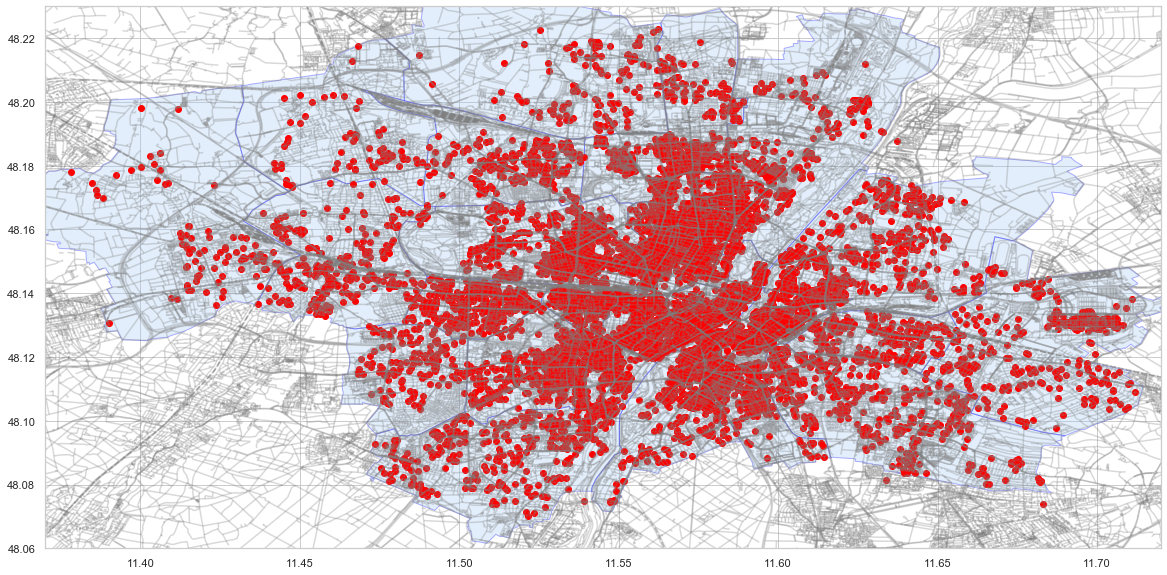

In [118]:
# Plotting all the Airbnb listings in Munich.
sns.set(style='whitegrid', palette='pastel')
sns.mpl.rc('figure', figsize=(20, 20))

fig, ax = plt.subplots()
plt.axis([11.37, 11.72, 48.06, 48.23])

df_areas.plot(ax=ax, alpha=0.3, edgecolor='blue')
railways.plot(ax=ax, alpha=0.3, color='grey', linestyle='dashed')
roads.plot(ax=ax, alpha=0.3, color='grey')
df_listings_geodata.plot(ax=ax, color='red')

In [78]:
def visualize_results(dataframe, color=None):
    """Accepts a GeoDataFrame & visualizes its geographic data in a matplotlib plot.
        
    :param x: geopandas.geodataframe.GeoDataFrame
    :return: None
    
    >>> visualize_results(df_listings)
    """
    
    sns.set(style='whitegrid', palette='pastel')
    sns.mpl.rc('figure', figsize=(20, 20))

    fig, ax = plt.subplots()
    ax.grid(False)
    plt.axis([11.35, 11.75, 48.05, 48.24]) # zoom in by adjusting the x & y axis according to the min & max latitude and longitude of the Airbnb data
    ax.set(xlabel='Latitude', ylabel='Longitude')
    df_areas.plot(ax=ax, alpha=0.3, edgecolor='blue')
    #railways.plot(ax=ax, alpha=0.3, color='grey', linestyle='dashed')
    #roads.plot(ax=ax, alpha=0.3, color='grey')
    dataframe.plot(ax=ax, color=color, markersize=20)

# Data Understanding

- first peek at all the Airbnb data sets on a high level
- search for unexpected data types

#### Description of Airbnb data sets

In [11]:
print("".join(["\n", "Name: ", "df_calendar"]))
df_calendar.info()
print("".join(["\n", "Name: ", "df_listings"]))
df_listings.info()
print("".join(["\n", "Name: ", "df_listings_detailed"]))
df_listings_detailed.info(verbose=True)
print("".join(["\n", "Name: ", "df_neighbourhoods"]))
df_neighbourhoods.info(verbose=True)
print("".join(["\n", "Name: ", "df_neighbourhoods_geo"]))
df_neighbourhoods_geo.info(verbose=True)
print("".join(["\n", "Name: ", "df_areas"]))
df_areas.info(verbose=True)
print("".join(["\n", "Name: ", "df_reviews"]))
df_reviews.info(verbose=True)
print("".join(["\n", "Name: ", "df_reviews_detailed"]))
df_reviews_detailed.info(verbose=True)


Name: df_calendar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190565 entries, 0 to 4190564
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 223.8+ MB

Name: df_listings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 16 columns):
id                                11481 non-null int64
name                              11459 non-null object
host_id                           11481 non-null int64
host_name                         11458 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     11481 non-null object
latitude                          11481 non-null float64
longitude                         11481 non-null float64
room_type                         11481 non-null object
price           

#### Findings:

df_calendar:
- has data on date in non-datetime format
- has non-numeric data on price
- dataframe has "year" information shifted by one year, see check_1
- dataframe has data for each listing for an entire year, see check_2

df_listings_detailed:
- has non-numeric data on price
- has the same number of listings as df_calendar, see check_3
- has slightly different data on price, as compared to the average price per listing in the df_calendar time series data, see check_4

#### df_calendar

In [49]:
# Converting the date column from object to datetime.
df_calendar.date = pd.to_datetime(df_calendar.date, format='%Y-%m-%d')

In [50]:
# Check_1: Deducting one year from the date column to shift the data into the past year.
df_calendar.date = df_calendar.date - pd.DateOffset(years=1)

In [51]:
def convert_price_dtype(dataframe, price_column):
    """Converts the type of data in a dataframe's column on price data from string to float.
    
    Before the type conversion, this method will remove $ and , symbols of the price data.
    After the conversion, it will overwrite the current price column.
    
    :param dataframe: pandas.core.frame.DataFrame
    :param price_column: str
    
    >>> df['price'] = convert_price_dtype(df, 'price')  
    """
    
    print("Original type of data in price column:", dataframe[price_column].dtypes)
    dataframe[price_column] = dataframe[price_column].str.strip('$')
    dataframe[price_column] = dataframe[price_column].str.replace(',', '') # strip(',') did not work for me here
    dataframe[price_column] = dataframe[price_column].astype('float')
    print("New type of data in price column:", dataframe[price_column].dtypes)
    return dataframe[price_column]

In [52]:
# Converting the price column in df_calendar from string to float.
df_calendar['price'] = convert_price_dtype(df_calendar, 'price')

Original type of data in price column: object
New type of data in price column: float64


In [53]:
# Converting the adjusted_price column in df_calendar from string to float.
df_calendar['adjusted_price'] = convert_price_dtype(df_calendar, 'adjusted_price')

Original type of data in price column: object
New type of data in price column: float64


In [9]:
# Verify whether there a big difference between price and adjusted_price of the time series data.
mean_price = df_calendar.groupby('listing_id').mean()['price'].mean()
print(mean_price)
mean_adjusted_price = df_calendar.groupby('listing_id').mean()['adjusted_price'].mean()
print(mean_adjusted_price)

113.840855231969
113.79676165508866


In [17]:
# Check_2: Indicating whether df_calendar has data for every day of 2019 for every listing.
check_2 = len(df_calendar) / 365 == len(df_listings)
print(check_2)

True


#### df_listings_detailed

In [8]:
# Converting the price column in df_listings_detailed from string to float.
df_listings_detailed['price'] = convert_price_dtype(df_listings_detailed, 'price')

Original type of data in price column: object
New type of data in price column: float64


In [11]:
# Check_3: Calculating whether there is an equal number of listings in df_calendar and df_listings_detailed.
check_3 = len(df_calendar.groupby('listing_id').mean()) == len(df_listings_detailed)
print(check_3)

True


In [11]:
# Check_4: Validating whether the listings are the same.
df_calendar_price_mean = df_calendar.groupby('listing_id').mean()['price'].mean()
df_listings_detailed_price_mean = df_listings_detailed.price.mean()

if df_calendar_price_mean == df_listings_detailed_price_mean:
    print("check_4: The information on price of each listing is identical")
else:
    print("check_4: The information on price of each listing differs.")
    print("df_calendar data on mean price:", df_calendar_price_mean)
    print("df_listings_detailed data on mean price:", df_listings_detailed_price_mean)

check_4: The information on price of each listing differs.
df_calendar data on mean price: 113.840855231969
df_listings_detailed data on mean price: 116.33646894869784


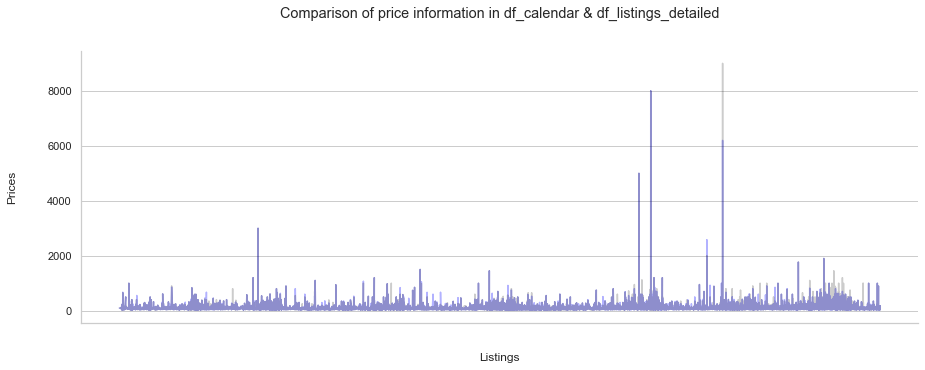

In [21]:
# Further visual analysis to which extent the price information of both dataframes differ.
df_calendar_per_listing = df_calendar.groupby('listing_id').mean()['price']
df_calendar_per_listing = df_calendar_per_listing.sort_index()
df_listings_detailed_prices = df_listings_detailed.groupby('id').mean()['price']
df_listings_detailed_prices = df_listings_detailed_prices.sort_index()

f, ax = plt.subplots(figsize=(15,5))

plt1 = sns.lineplot(ax=ax, x=df_calendar_per_listing.index, y=df_calendar_per_listing, color="blue", alpha=0.3)
plt2 = sns.lineplot(ax=ax, x=df_listings_detailed_prices.index, y=df_listings_detailed_prices, color="black", alpha=0.2)

sns.set(font_scale=1.2, style='whitegrid')
sns.despine()
ax.set_title('Comparison of price information in df_calendar & df_listings_detailed', y=1.10)
ax.set(xlabel='Listings', ylabel='Prices (in EUR)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

# Data Preparation
- search for duplicate data
- search for NaN data

#### Preparing df_calendar

#### Search for duplicate data in df_calendar

In [56]:
# Counting the number of duplicated rows.
print("There are", len(df_calendar[df_calendar.duplicated(keep=False) == True]), "rows with duplicated values.")

# Filtering for all duplicated data.
df_calendar[df_calendar.duplicated(keep=False) == True]

There are 0 rows with duplicated values.


Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights]
Index: []

In [55]:
# Dropping all duplicates.
df_calendar = df_calendar.drop_duplicates()

#### Search for NaN data in df_calendar

In [57]:
# Dropping rows which have NaN values only.
df_calendar = df_calendar.dropna(how='all')

In [58]:
# Counting number of missing values in times series data.
print("".join(["\n", "NaN values:"]))
df_calendar.isnull().sum()


NaN values:


listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      0
maximum_nights      0
dtype: int64

In [13]:
# Filtering df_calendar for missing data in the price column.
df_calendar_nans = df_calendar[df_calendar.price.isnull()]

# Generating summary statistics on the dataframe with missing price data.
# Apparently all data is missing for the same listing_id.
df_calendar_nans.describe()

listing_id  price  adjusted_price  minimum_nights  maximum_nights
count       171.0    0.0             0.0           171.0           171.0
mean   31916328.0    NaN             NaN            30.0           180.0
std           0.0    NaN             NaN             0.0             0.0
min    31916328.0    NaN             NaN            30.0           180.0
25%    31916328.0    NaN             NaN            30.0           180.0
50%    31916328.0    NaN             NaN            30.0           180.0
75%    31916328.0    NaN             NaN            30.0           180.0
max    31916328.0    NaN             NaN            30.0           180.0

In [33]:
# Validating that all entries with missing price data are related to the same listing_id.
print("Number of entries in df_calendar_nans which are not related to listing_id '31916328':", len(df_calendar_nans.listing_id[df_calendar_nans.listing_id != 31916328]))

Number of entries in df_calendar_nans which are not related to listing_id '31916328': 0


In [34]:
# Checking whether this listing_id has generally no price information in df_calendar.
print("Number of entries in df_calendar related to listing_id '31916328' with price data:", len(df_calendar.price[(df_calendar.listing_id == 31916328) & (df_calendar.price.notnull())]))

Number of entries in df_calendar related to listing_id '31916328' with price data: 193


In [59]:
# Imputing the missing price data in df_calendar with the mean of the available price data on listing_id '31916328'.
mean_price_id_31916328 = df_calendar.price[(df_calendar.listing_id == 31916328) & (df_calendar.price.notnull())].mean()
df_calendar.price = df_calendar.price.fillna(mean_price_id_31916328)
df_calendar.price.isnull().any()

False

#### Preparing df_listings_detailed

#### Search for duplicate data in df_listings_detailed

In [18]:
print("There are", len(df_listings_detailed[df_listings_detailed.duplicated() == True]), "rows with duplicated values.")

There are 0 rows with duplicated values.


#### Search for NaN data in df_listings_detailed

In [15]:
# Counting number of missing values in times series data.
print("".join(["\n", "NaN values:"]))
df_listings_detailed.isnull().sum()


NaN values:


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              22
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2554
Length: 106, dtype: int64

In [20]:
# Dropping columns with only NaN values.
df_listings_detailed = df_listings_detailed.dropna(axis=1, how='all')

# When are the most (& the least) Airbnb listings in Munich available?

#### Finding the amount of not-available listings per day

In [16]:
def encoding_str_to_int(dataframe, column, datetime_column, string_data, integer):
    """Method to replace string data in a dataframe with an integer.
    
    Specific method for encoding string data in a dataframe with time series data to an integer.
    Filters for specific string data in a column and then replaces this string data with an integer.
    Sums up the encoded column and groups by a datetime column.
    Returns this column as a DataFrame.
    
    :param dataframe: pandas.core.frame.DataFrame
    :param column: str
    :param datetime_column: str
    :param string_data: str
    :param integer: int
    
    >>> df_availability = encoding_str_to_int(df_calendar, 'available', 'date', 'f', 1)
    """
    
    df_filtered = dataframe[dataframe[column] == string_data]
    df_filtered[column] = df_filtered[column].replace(string_data, integer)
    df_encoded = df_filtered.groupby(datetime_column).sum()
    return df_encoded

In [17]:
listings_unavailability = encoding_str_to_int(df_calendar, 'available', 'date', 'f', 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Finding the amount of available listings per day

In [18]:
listings_availability = encoding_str_to_int(df_calendar, 'available', 'date', 't', 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Visualizing the count of unavailable & available listings of the year

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


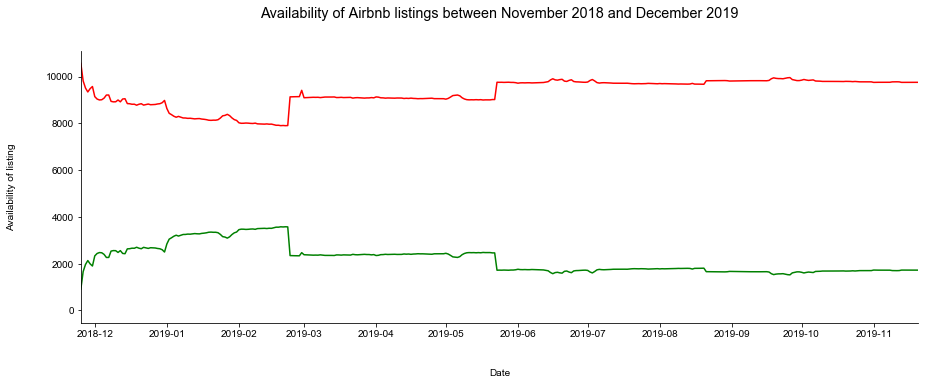

In [28]:
f, ax = plt.subplots(figsize=(15,5))

plt1 = sns.lineplot(ax=ax, x=listings_availability.index, y=listings_availability.available, color="green")
plt2 = sns.lineplot(ax=ax, x=listings_unavailability.index, y=listings_unavailability.available, color="red")

sns.set(font_scale=1.2, style='whitegrid')
sns.despine()
ax.set_title('Availability of Airbnb listings between November 2018 and December 2019', y=1.10)
ax.set(xlabel='Date', ylabel='Availability of listing', xlim=['2018-11-25', '2019-11-20'])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

Findings:
- There are always more listings not available than available
- The first quarter of the year has the most listings available. During the rest of the year, availability decreased.

# When was (on average) the most expensive time to book a listing in Munich?

#### Checking whether prices generally can change over a year

In [19]:
# Grouping the time series data by the listings and each their dates.
days_per_listing = df_calendar.groupby(['listing_id', 'date']).sum()

# Counting the number of listings in the time series data.
data_per_listing = df_calendar.groupby('listing_id').sum()
listings = list(data_per_listing.index)

In [39]:
# Finding the number of listings with prices deviating from their mean price over the last year.
listings_deviating_prices = []
std_all = []
for listing in listings:
    listing_std = days_per_listing.loc[listing]['price'].std()
    if listing_std != 0:
        listings_deviating_prices.append(listing)
        std_all.append(listing_std)

print(len(listings_deviating_prices), "listings (i.e.,", round(len(listings_deviating_prices) / len(listings), 2)*100, "% of all listings) have changed their prices over the past year.")

5227 listings (i.e., 46.0 % of all listings) have changed their prices over the past year.


In [41]:
# Since almost half of the listings have changed their prices of the year: 
# Searching for a threshold to filter for listings with a comparatively very strong price deviation.
std_all_array = np.array(std_all)
top_deviators = np.percentile(std_all_array, 99)
print(top_deviators)

174.63820460503808


In [48]:
# Finding those listings with large price changes.
listings_deviating_prices_strongly = []
for listing in listings:
    listing_std = days_per_listing.loc[listing]['price'].std()
    if listing_std > top_deviators:
        listings_deviating_prices_strongly.append(listing)
        
print(len(listings_deviating_prices_strongly), "listings (i.e.,", round(len(listings_deviating_prices_strongly) / len(listings), 3)*100, "% of all listings) have changed their prices over the past year more strongly.")

53 listings (i.e., 0.5 % of all listings) have changed their prices over the past year more strongly.


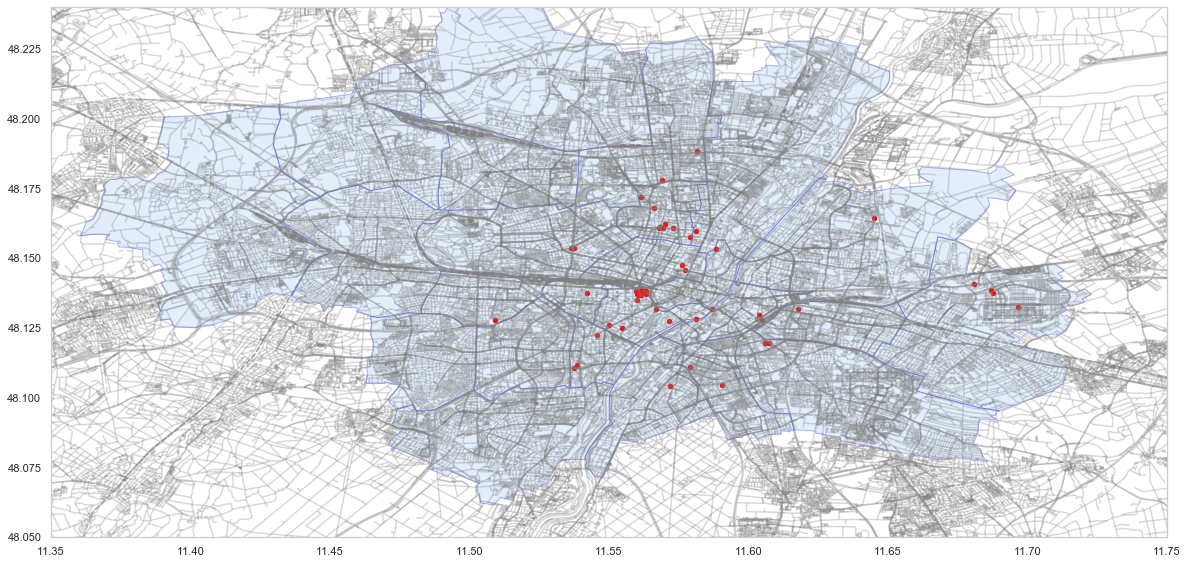

In [41]:
# Visualizing the location of these listings with comparatively strong price deviation.
listings_deviating_prices_strongly_coordinates = df_listings_detailed[df_listings_detailed['id'].isin(listings_deviating_prices_strongly)].groupby('id').mean()
df_listings_deviating_prices_strongly_coordinates_geodata = gpd.GeoDataFrame(listings_deviating_prices_strongly_coordinates, geometry=[Point(coordinates) for coordinates in zip(listings_deviating_prices_strongly_coordinates['longitude'], listings_deviating_prices_strongly_coordinates['latitude'])])
df_listings_deviating_prices_strongly_coordinates_geodata.crs = {'init' :'epsg:4326'}
visualize_results(df_listings_deviating_prices_strongly_coordinates_geodata, color='red')

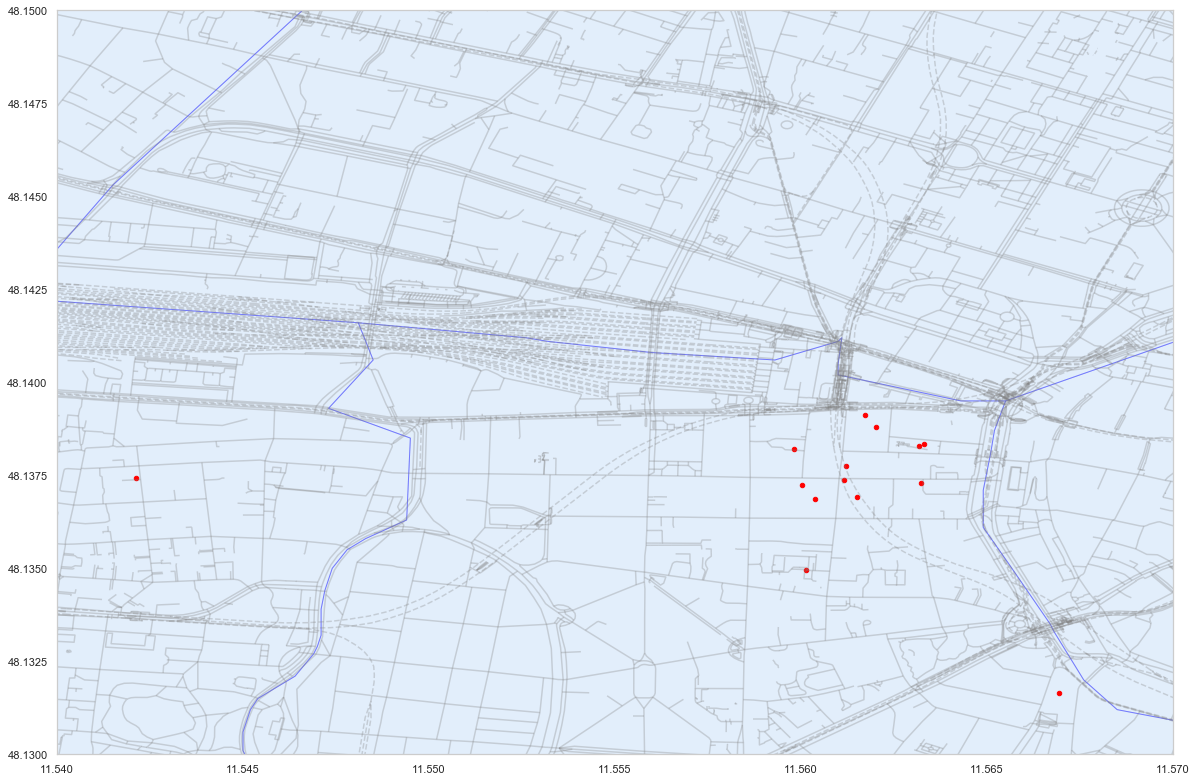

In [42]:
sns.set(style='whitegrid', palette='pastel')
sns.mpl.rc('figure', figsize=(20, 20))

fig, ax = plt.subplots()
ax.grid(False)
plt.axis([11.54, 11.57, 48.13, 48.15])
df_areas.plot(ax=ax, alpha=0.3, edgecolor='blue')
railways.plot(ax=ax, alpha=0.3, color='grey', linestyle='dashed')
roads.plot(ax=ax, alpha=0.3, color='grey')
df_listings_deviating_prices_strongly_coordinates_geodata.plot(ax=ax, color='red', markersize=20)

In [43]:
# Searching for an example of strong price deviation during the Oktoberfest period (price jumped from 39 EUR to 900 EUR around the time of the festival from 21 September to 6 October 2019).
listings_deviating_prices_strongly_coordinates.sort_values('latitude')
df_calendar[df_calendar.listing_id == 19818412].iloc[280:320,:]

listing_id       date available  price  adjusted_price  \
1650049  19818412.0 2019-09-01         t   39.0            39.0   
1650050  19818412.0 2019-09-02         t   39.0            39.0   
1650051  19818412.0 2019-09-03         t   39.0            39.0   
1650052  19818412.0 2019-09-04         t   39.0            39.0   
1650053  19818412.0 2019-09-05         t   39.0            39.0   
1650054  19818412.0 2019-09-06         t   39.0            39.0   
1650055  19818412.0 2019-09-07         t   39.0            39.0   
1650056  19818412.0 2019-09-08         t   39.0            39.0   
1650057  19818412.0 2019-09-09         t   39.0            39.0   
1650058  19818412.0 2019-09-10         t   39.0            39.0   
1650059  19818412.0 2019-09-11         t   39.0            39.0   
1650060  19818412.0 2019-09-12         t   39.0            39.0   
1650061  19818412.0 2019-09-13         t   39.0            39.0   
1650062  19818412.0 2019-09-14         t  990.0           990.0   
1650063  19818412.0 2019-09-15         t   39.0            39.0   
1650064  19818412.0 2019-09-16         t   39.0            39.0   
1650065  19818412.0 2019-09-17         t  999.0           999.0   
1650066  19818412.0 2019-09-18         t  999.0           999.0   
1650067  19818412.0 2019-09-19         t  999.0           999.0   
1650068  19818412.0 2019-09-20         t  999.0           999.0   
1650069  19818412.0 2019-09-21         t  999.0           999.0   
1650070  19818412.0 2019-09-22         t  999.0           999.0   
1650071  19818412.0 2019-09-23         t  999.0           999.0   
1650072  19818412.0 2019-09-24         t  999.0           999.0   
1650073  19818412.0 2019-09-25         t  999.0           999.0   
1650074  19818412.0 2019-09-26         t  999.0           999.0   
1650075  19818412.0 2019-09-27         t  999.0           999.0   
1650076  19818412.0 2019-09-28         t  999.0           999.0   
1650077  19818412.0 2019-09-29         t  999.0           999.0   
1650078  19818412.0 2019-09-30         t  999.0           999.0   
1650079  19818412.0 2019-10-01         t  999.0           999.0   
1650080  19818412.0 2019-10-02         t  999.0           999.0   
1650081  19818412.0 2019-10-03         t  999.0           999.0   
1650082  19818412.0 2019-10-04         t  999.0           999.0   
1650083  19818412.0 2019-10-05         t   39.0            39.0   
1650084  19818412.0 2019-10-06         t   39.0            39.0   
1650085  19818412.0 2019-10-07         t   39.0            39.0   
1650086  19818412.0 2019-10-08         t   39.0            39.0   
1650087  19818412.0 2019-10-09         t   39.0            39.0   
1650088  19818412.0 2019-10-10         t   39.0            39.0   
1650089  19818412.0 2019-10-11         t   39.0            39.0   
1650090  19818412.0 2019-10-12         t   39.0            39.0   
1650091  19818412.0 2019-10-13         t   39.0            39.0   
1650092  19818412.0 2019-10-14         t   39.0            39.0   
1650093  19818412.0 2019-10-15         t   39.0            39.0   
1650094  19818412.0 2019-10-16         t   39.0            39.0   
1650095  19818412.0 2019-10-17         t   39.0            39.0   
1650493  19818412.0 2019-10-18         t   39.0            39.0   
1650494  19818412.0 2019-10-19         t   39.0            39.0   
1650495  19818412.0 2019-10-20         t   39.0            39.0   
1650496  19818412.0 2019-10-21         t   39.0            39.0   
1650497  19818412.0 2019-10-22         t   39.0            39.0   
1650498  19818412.0 2019-10-23         t   39.0            39.0   
1650499  19818412.0 2019-10-24         t   39.0            39.0   
1650500  19818412.0 2019-10-25         t   39.0            39.0   
1650501  19818412.0 2019-10-26         t   39.0            39.0   
1650502  19818412.0 2019-10-27         t   39.0            39.0   
1650503  19818412.0 2019-10-28         t   39.0            39.0   
1650504  19818412.0 2019-10-29         t   39.0         

#### Find prices per day

In [20]:
# Finding the time of the year with the top 10 average price of all listings.
prices_per_day = df_calendar.groupby('date').mean()['price']
prices_per_day.sort_values(ascending=False).head(10)

date
2019-09-26    130.161729
2019-09-25    130.025330
2019-10-03    129.965405
2019-10-02    129.929520
2019-09-19    129.752619
2019-09-27    128.334885
2019-10-01    128.249091
2019-09-20    128.187511
2019-09-30    128.135512
2019-09-24    128.128544
Name: price, dtype: float64

In [45]:
# Filtering for strong price deviators.
strong_deviators = df_calendar[df_calendar['listing_id'].isin(listings_deviating_prices_strongly)]
prices_per_day_strong_deviators = strong_deviators.groupby('date').mean()['price']

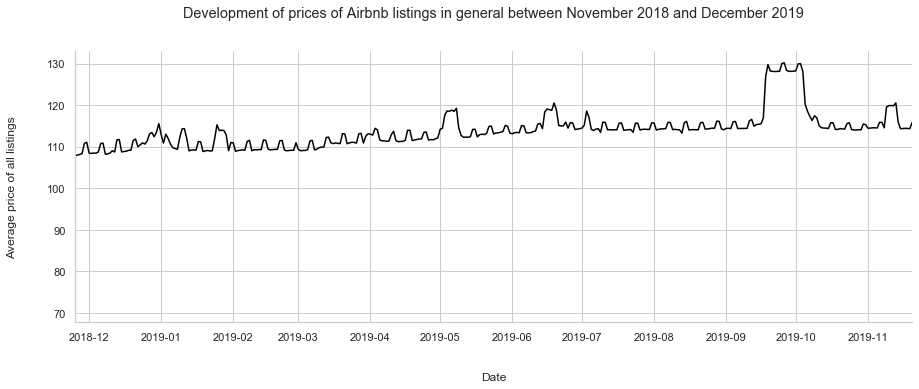

In [46]:
f, ax = plt.subplots(figsize=(15,5))

plt1 = sns.lineplot(ax=ax, x=prices_per_day.index, y=prices_per_day, color="black")

sns.set(font_scale=1.2, style='whitegrid')
sns.despine()
ax.set_title('Development of prices of Airbnb listings in general between November 2018 and December 2019', y=1.10)
ax.set(xlabel='Date', ylabel='Average price of all listings (in EUR)', xlim=['2018-11-25', '2019-11-20'])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

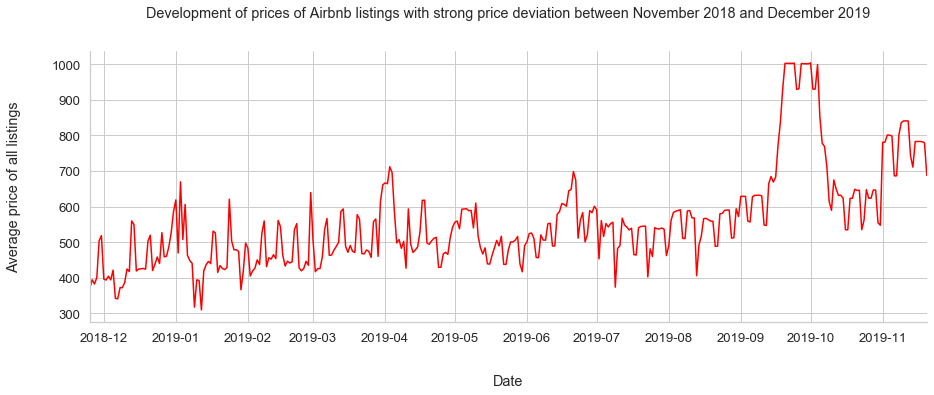

In [47]:
f, ax = plt.subplots(figsize=(15,5))

plt2 = sns.lineplot(ax=ax, x=prices_per_day_strong_deviators.index, y=prices_per_day_strong_deviators, color="red")

sns.set(font_scale=1.2, style='whitegrid')
sns.despine()
ax.set_title('Development of prices of Airbnb listings with strong price deviation between November 2018 and December 2019', y=1.10)
ax.set(xlabel='Date', ylabel='Average price of all listings (in EUR)', xlim=['2018-11-25', '2019-11-20'])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30

Findings:
- In general, prices remain quite stable over the year, with exception of the Octoberfest
- Hosts in the center who tend to change their prices, will particularly during Octoberfest rip you off

# Where are the most (& least) expensive Airbnb listings located in Munich?

#### Calculate the overall minimum, average, and maximum price of Airbnb listings in Munich in 2019

In [48]:
df_calendar.price.describe()

count    4.179489e+06
mean     1.138470e+02
std      1.575871e+02
min      9.000000e+00
25%      5.500000e+01
50%      8.200000e+01
75%      1.300000e+02
max      9.039000e+03
Name: price, dtype: float64

In [95]:
# Finding the 95th percentile of the prices of all listings.
price_all_array = np.array(df_calendar.price)
top_ten_percent = np.percentile(price_all_array, 95)

In [86]:
# Finding the 5th percentile of the prices of all listings.
bottom_quartile = np.percentile(price_all_array, 5)

In [87]:
df_low_priced_listings = df_calendar[df_calendar.price <= bottom_quartile]

In [88]:
# Filtering for the bottom percentile listings during the Oktoberfest season.
df_low_priced_listings = df_low_priced_listings[(df_low_priced_listings.date > '2019-09-10') & (df_low_priced_listings.date < '2019-10-10')]

#### Searching for the low priced (25th percentile) listings with their geographic data and their average price.

In [90]:
#df_low_priced_listings = df_calendar[df_calendar.price <= bottom_quartile]
low_priced_coordinates = df_listings_detailed[df_listings_detailed['id'].isin(df_low_priced_listings['listing_id'])].groupby('id').mean()
low_priced_avg_price = round(df_listings_detailed[df_listings_detailed['id'].isin(df_low_priced_listings['listing_id'])].groupby('id').mean()['price'].mean(), 2)
print("In the 25th percentile, there were", len(low_priced_coordinates), "listings with an average price of", low_priced_avg_price, "EUR.")

In the 25th percentile, there were 549 listings with an average price of 30.75 EUR.


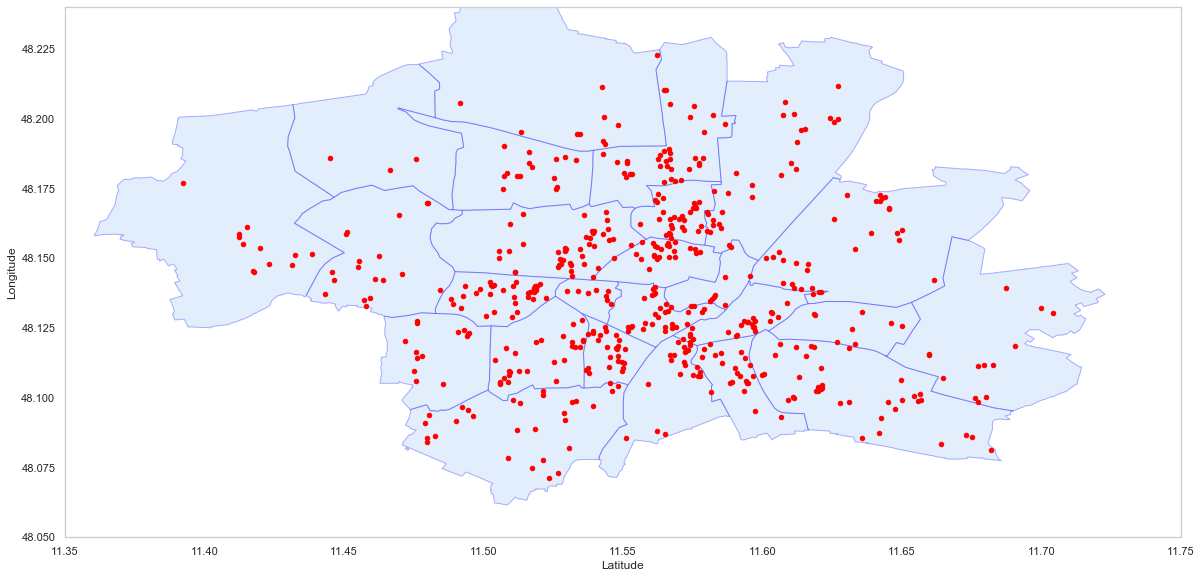

In [91]:
df_low_priced_listings_geodata = gpd.GeoDataFrame(low_priced_coordinates, geometry=[Point(coordinates) for coordinates in zip(low_priced_coordinates['longitude'], low_priced_coordinates['latitude'])])
df_low_priced_listings_geodata.crs = {'init' :'epsg:4326'}
visualize_results(df_low_priced_listings_geodata, color='red')

#### Searching for the high priced (90th percentile) listings with their geographic data and their average price.

In [96]:
df_high_priced_listings = df_calendar[df_calendar.price >= top_ten_percent]
high_priced_coordinates = df_listings_detailed[df_listings_detailed['id'].isin(df_high_priced_listings['listing_id'])].groupby('id').mean()
high_priced_avg_price = round(df_listings_detailed[df_listings_detailed['id'].isin(df_high_priced_listings['listing_id'])].groupby('id').mean()['price'].mean(), 2)
print("In the 90th percentile, there were", len(high_priced_coordinates), "listings with an average price of", high_priced_avg_price, "EUR.")

In the 90th percentile, there were 990 listings with an average price of 338.6 EUR.


In [97]:
df_high_priced_listings = df_high_priced_listings[(df_high_priced_listings.date > '2019-09-10') & (df_high_priced_listings.date < '2019-10-10')]

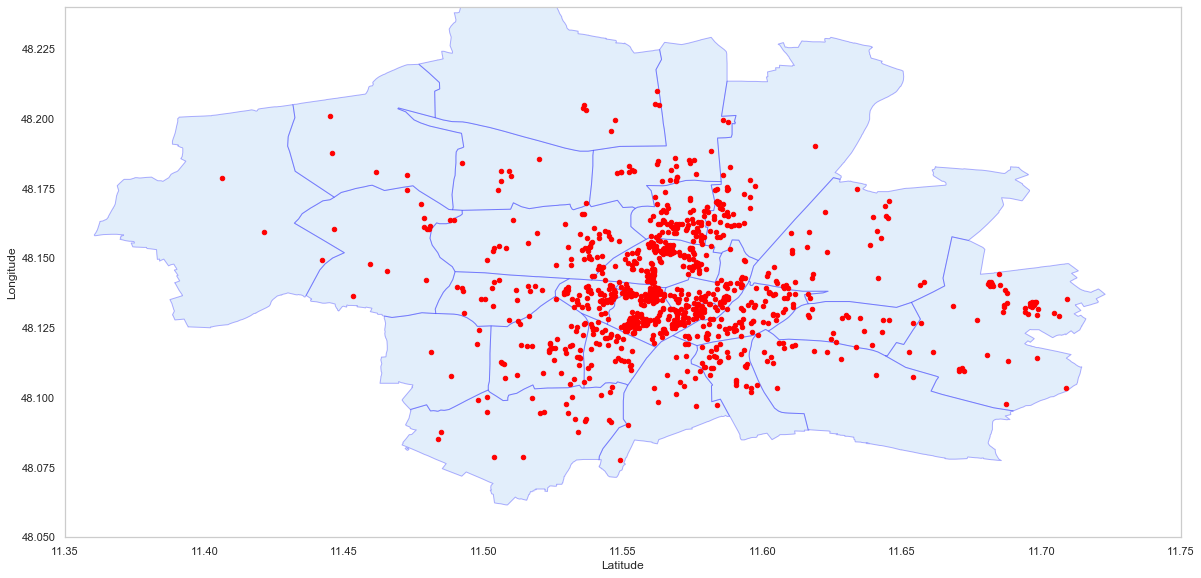

In [98]:
df_high_priced_listings_geodata = gpd.GeoDataFrame(high_priced_coordinates, geometry=[Point(coordinates) for coordinates in zip(high_priced_coordinates['longitude'], high_priced_coordinates['latitude'])])
df_high_priced_listings_geodata.crs = {'init' :'epsg:4326'}
visualize_results(df_high_priced_listings_geodata, color='red')

#### Sorting areas by their mean price of Airbnb listings above the overall average price

In [200]:
prices_area = df_listings_detailed.price.groupby(df_listings_detailed['neighbourhood']).mean().sort_values()
prices_area_above_avg = prices_area[prices_area > df_calendar.price.mean()]

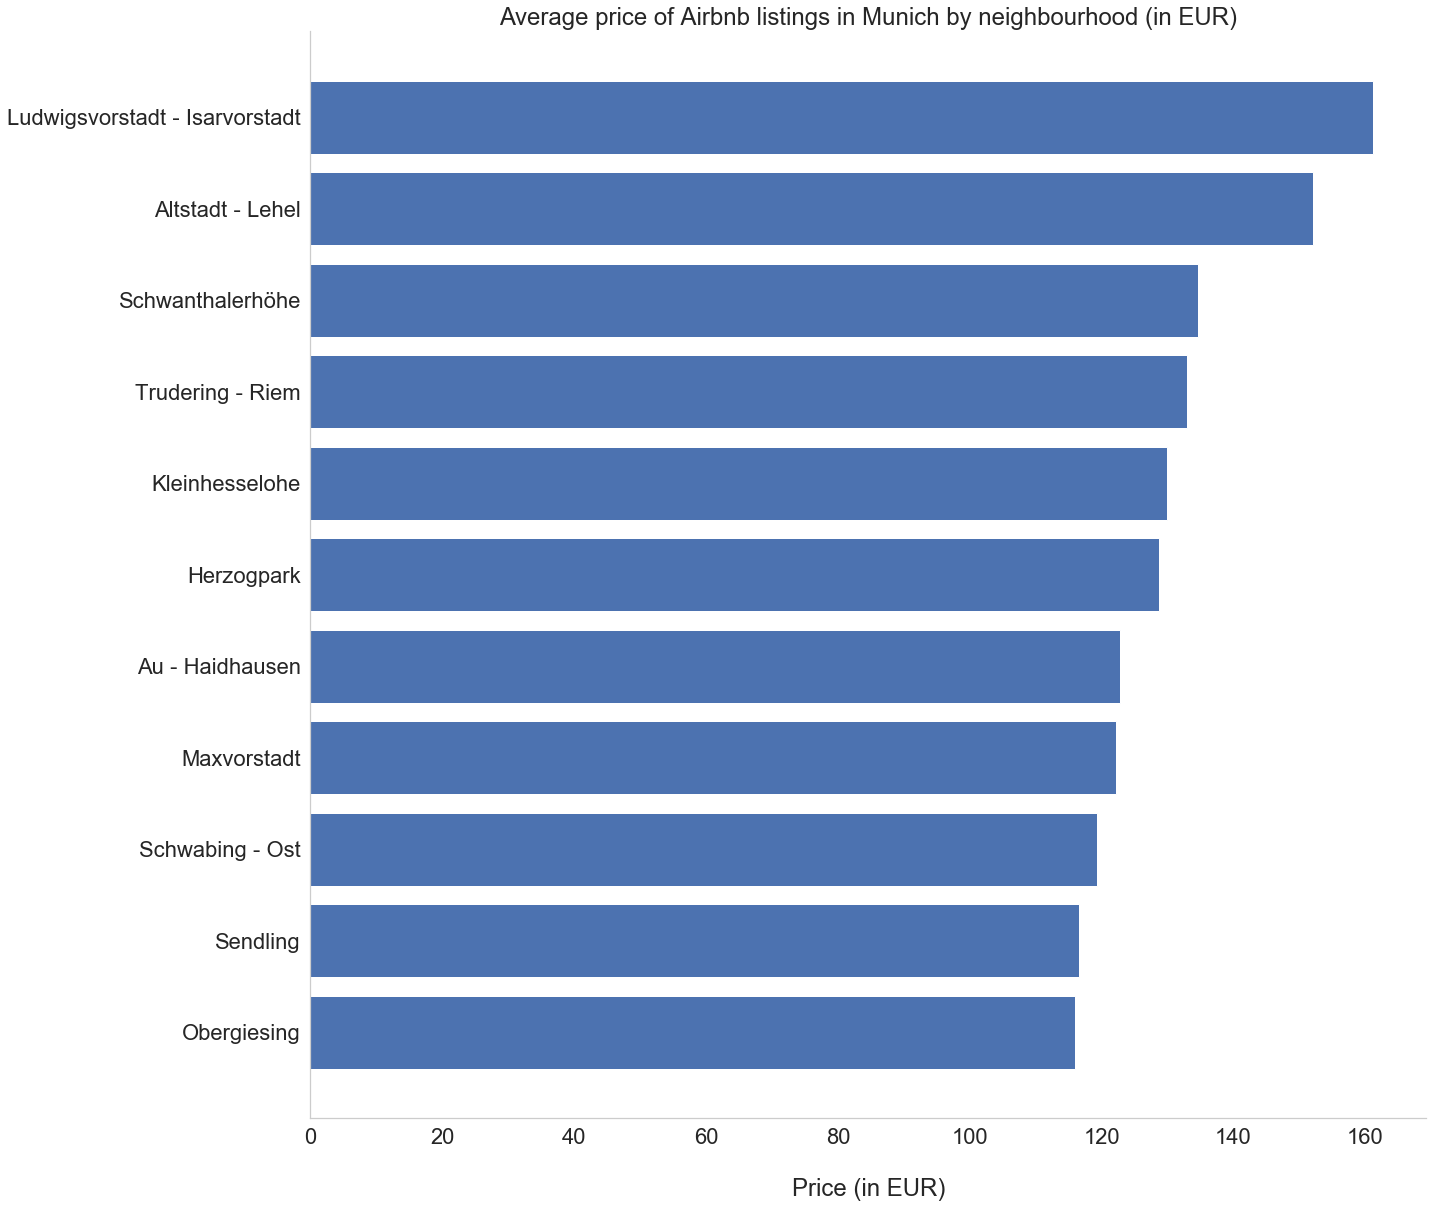

In [206]:
fig, ax = plt.subplots()

yaxis = np.arange(0, len(prices_area_above_avg.index))
rects = ax.barh(yaxis, prices_area_above_avg)
ax.grid(False)

sns.set(font_scale=2, style='whitegrid')
sns.despine()
ax.set_title("Average price of Airbnb listings in Munich by neighbourhood (in EUR)")
ax.set(xlabel='Price (in EUR)')
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
ax.set_yticklabels(prices_area_above_avg.index)
ax.set_yticks(yaxis)

In [114]:
mean_prices_area = df_listings_detailed.price.groupby(df_listings_detailed['neighbourhood']).mean().sort_values()

Finding:
- For the Octoberfest, central locations are more expensive
- Also in general, central locations or at the Messe München (Trudering) are more expensive
- mean price over all around 113 EUR > everything above is central or trade fair

# Does a good ranking influence whether a listing gets booked?

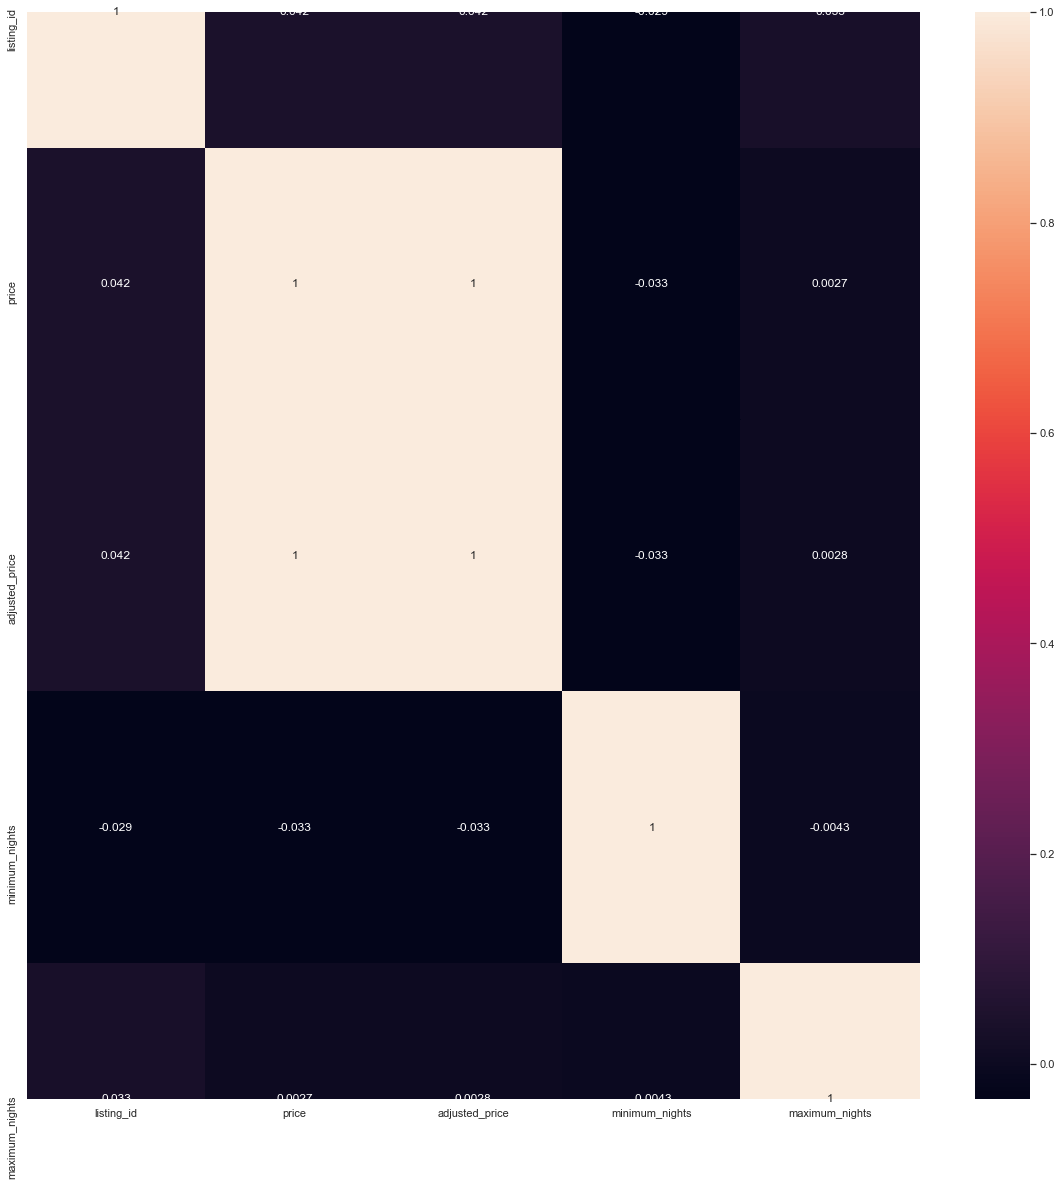

In [113]:
corrmat = df_calendar.corr()
sns.heatmap(corrmat, annot=True)

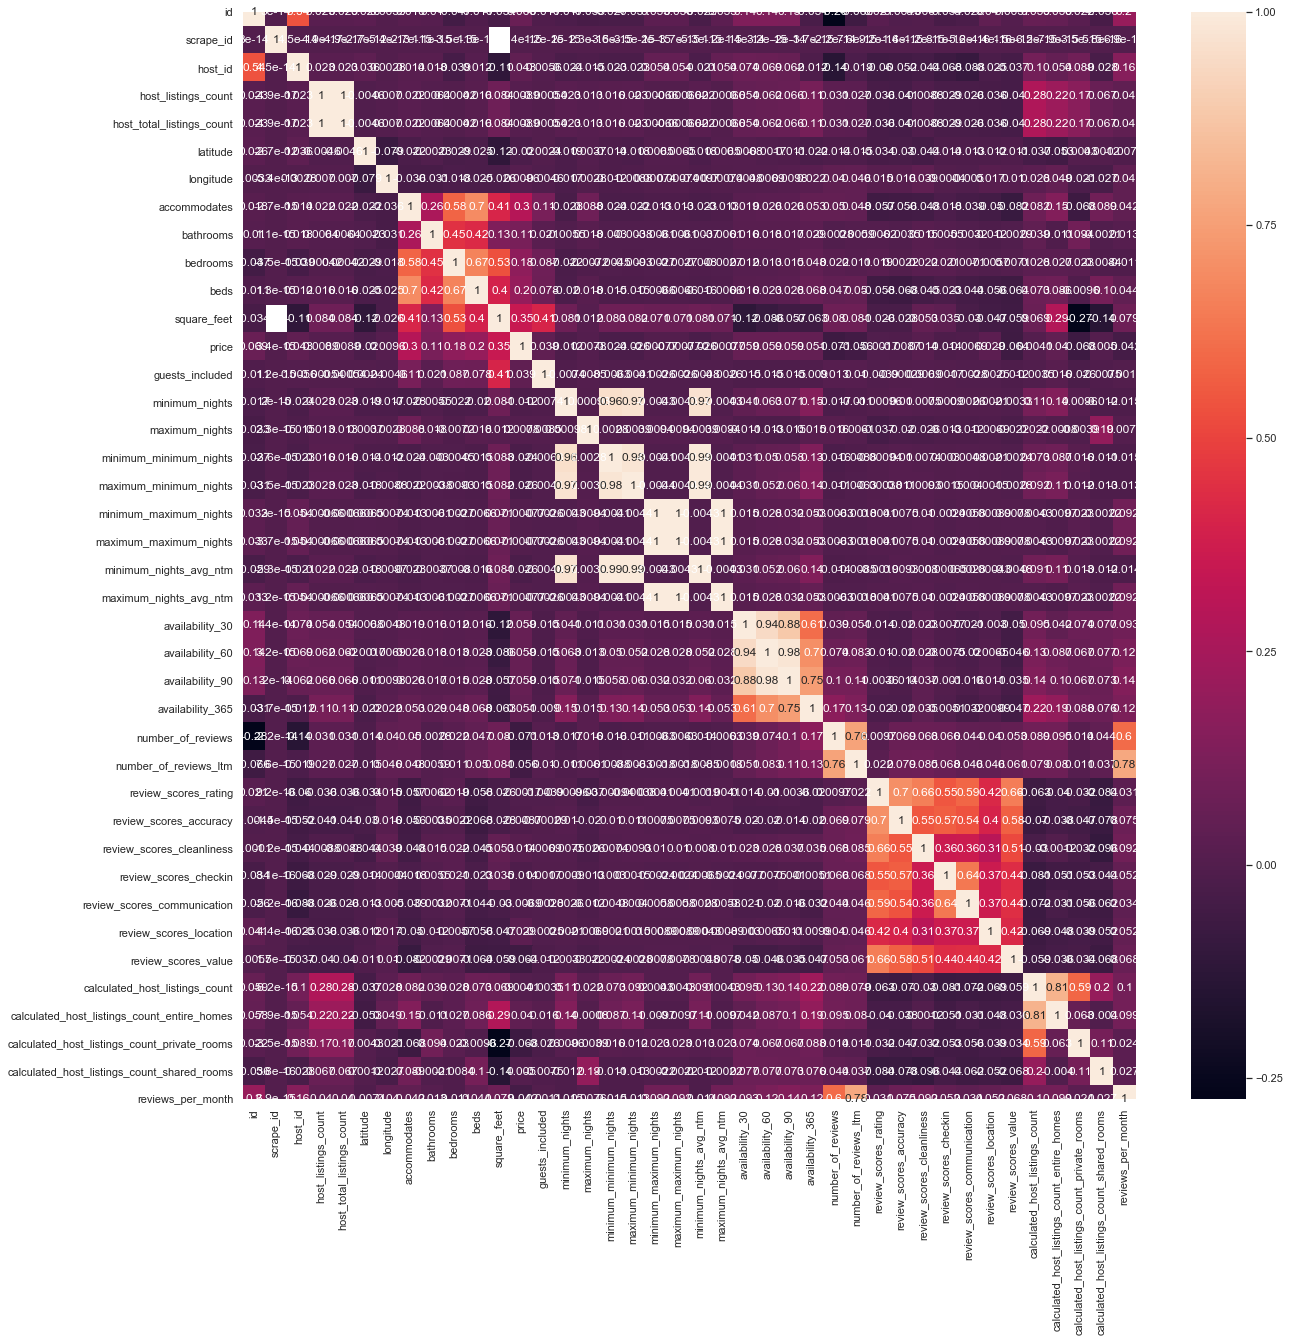

In [115]:
corrmat = df_listings_detailed.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

In [92]:
availability_status = df_calendar.groupby(['listing_id', 'date']).last()

In [107]:
false_ava = availability_status[availability_status.available=='f'].sort_index()

In [108]:
false_ava.drop(false_ava.iloc[:,1:], axis=1, inplace=True)

In [138]:
listing_ids = list(false_ava.index.get_level_values(0).unique())

In [166]:
unavailability = []
for listing, counter in false_ava.groupby(level=0):
    res = len(counter.values)
    unavailability.append(res)

In [177]:
len(listing_ids)

11288

In [176]:
len(unavailability)

11288

In [167]:
index = range(0, 11288)
data = {'listing_ids' : listing_ids, 'unavailability' : unavailability}

In [168]:
new_df = pd.DataFrame(index=index, data=data)

In [169]:
new_df

listing_ids  unavailability
0            36720             364
1            97945             280
2           114695             201
3           127383             364
4           157808             359
...            ...             ...
11283     40342200             330
11284     40343877             341
11285     40344151             331
11286     40347084             300
11287     40354205             359

[11288 rows x 2 columns]

In [170]:
true_ava = availability_status[availability_status.available == "t"].sort_index()

In [171]:
true_ava.drop(false_ava.iloc[:,1:], axis=1, inplace=True)

In [172]:
listing_ids_ta = list(true_ava.index.get_level_values(0).unique())

In [178]:
availability = []
for listing, counter in true_ava.groupby(level=0):
    res = len(counter.values)
    availability.append(res)

In [174]:
len(listing_ids_ta)

5711

In [179]:
len(availability)

5711

In [180]:
index_2 = range(0, 5711)
data_2 = {'listing_ids' : listing_ids_ta, 'availability' : availability}

In [181]:
other_df = pd.DataFrame(index=index_2, data=data_2)

In [182]:
result_end = pd.merge(new_df, other_df, how='inner', on='listing_ids')

In [183]:
result_end

listing_ids  unavailability  availability
0           97945             280            84
1          114695             201           163
2          157808             359             5
3          159634             331            33
4          170154             235           129
...           ...             ...           ...
5513     40342200             330            34
5514     40343877             341            23
5515     40344151             331            33
5516     40347084             300            64
5517     40354205             359             5

[5518 rows x 3 columns]

In [222]:
# only columns which have:
# not only (or not more than 10%) NaNs
# not only one value
# free text fields

temp = df_listings_detailed[[
    'id',
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'is_location_exact',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'guests_included',
    'number_of_reviews',
    'instant_bookable',
    'cancellation_policy',
    'require_guest_phone_verification']]

In [223]:
temp.isnull().sum()

id                                   0
host_is_superhost                   23
host_has_profile_pic                23
host_identity_verified              23
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           21
bedrooms                            30
beds                                18
guests_included                      0
number_of_reviews                    0
instant_bookable                     0
cancellation_policy                  0
require_guest_phone_verification     0
dtype: int64

In [224]:
for col in temp:
    print(col, ":", temp[col].unique(), ",", temp[col].nunique(), ",", temp[col].value_counts(), "\n")

id : [   36720    97945   114695 ... 40344151 40347084 40354205] , 11481 , 14174207    1
20878560    1
28865788    1
7707897     1
15766776    1
           ..
23102117    1
28023868    1
38345928    1
32152934    1
35591602    1
Name: id, Length: 11481, dtype: int64 

host_is_superhost : ['f' 't' nan] , 2 , f    10009
t     1449
Name: host_is_superhost, dtype: int64 

host_has_profile_pic : ['t' nan 'f'] , 2 , t    11403
f       55
Name: host_has_profile_pic, dtype: int64 

host_identity_verified : ['f' nan 't'] , 2 , f    7915
t    3543
Name: host_identity_verified, dtype: int64 

is_location_exact : ['t' 'f'] , 2 , t    8368
f    3113
Name: is_location_exact, dtype: int64 

property_type : ['Apartment' 'House' 'Condominium' 'Townhouse' 'Villa' 'Boutique hotel'
 'Loft' 'Camper/RV' 'Other' 'Bed and breakfast' 'Serviced apartment'
 'Guest suite' 'Castle' 'Guesthouse' 'Cabin' 'Farm stay' 'Tiny house'
 'Tent' 'Bungalow' 'Hostel' 'Hut' 'Cave' 'Boat' 'Earth house' 'Aparthotel'
 'Hotel' 'Tip

In [225]:
temp = temp.dropna()

In [226]:
tobeonehotted = temp[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'room_type', 'bedrooms', 'instant_bookable', 'cancellation_policy']]

In [227]:
tobeonehotted['bedrooms'] = tobeonehotted['bedrooms'].replace(tobeonehotted['bedrooms'] > 0, "t")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
tobeonehotted['bedrooms'].unique()

array(['t', 2.0, 3.0, 5.0, 4.0, 7.0, 8.0, 10.0, 6.0, 20.0, 25.0],
      dtype=object)

In [213]:
tobeonehotted['bedrooms'] = tobeonehotted.replace(tobeonehotted[tobeonehotted['bedrooms'] == 0], "f")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
tobeonehotted['bedrooms'].unique()

array([36720, 97945, 127383, ..., 40343877, 40344151, 40354205],
      dtype=object)

In [215]:
tobeonehotted

id host_is_superhost host_has_profile_pic host_identity_verified  \
0         36720                 f                    t                      f   
1         97945                 t                    t                      f   
3        127383                 t                    t                      t   
4        157808                 f                    t                      f   
5        159634                 f                    t                      t   
...         ...               ...                  ...                    ...   
11474  40340595                 f                    t                      f   
11476  40342200                 f                    t                      f   
11477  40343877                 f                    t                      f   
11478  40344151                 f                    t                      f   
11480  40354205                 t                    t                      f   

      is_location_exact        room_type  bedrooms instant_bookable  \
0                     t  Entire home/apt     36720                f   
1                     t  Entire home/apt     97945                f   
3                     t  Entire home/apt    127383                f   
4                     t     Private room    157808                f   
5                     t  Entire home/apt    159634                t   
...                 ...              ...       ...              ...   
11474                 t  Entire home/apt  40340595                f   
11476                 t  Entire home/apt  40342200                f   
11477                 t     Private room  40343877                f   
11478                 t     Private room  40344151                f   
11480                 t     Private room  40354205                f   

               cancellation_policy  
0      strict_14_with_grace_period  
1                         flexible  
3                         flexible  
4                         moderate  
5                         flexible  
...                            ...  
11474                     moderate  
11476                     moderate  
11477                     flexible  
11478                     flexible  
11480  strict_14_with_grace_period  

[11395 rows x 9 columns]

In [204]:
from sklearn.preprocessing import OneHotEncoder

In [205]:
enc = OneHotEncoder(handle_unknown='ignore')

In [207]:
enc.fit(tobeonehotted)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [209]:
enc.categories_

[array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['flexible', 'moderate', 'strict', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

In [210]:
temp

id host_is_superhost host_has_profile_pic host_identity_verified  \
0         36720                 f                    t                      f   
1         97945                 t                    t                      f   
3        127383                 t                    t                      t   
4        157808                 f                    t                      f   
5        159634                 f                    t                      t   
...         ...               ...                  ...                    ...   
11474  40340595                 f                    t                      f   
11476  40342200                 f                    t                      f   
11477  40343877                 f                    t                      f   
11478  40344151                 f                    t                      f   
11480  40354205                 t                    t                      f   

      is_location_exact property_type        room_type  accommodates  \
0                     t     Apartment  Entire home/apt             2   
1                     t     Apartment  Entire home/apt             2   
3                     t     Apartment  Entire home/apt             4   
4                     t     Apartment     Private room             2   
5                     t     Apartment  Entire home/apt             3   
...                 ...           ...              ...           ...   
11474                 t     Apartment  Entire home/apt             1   
11476                 t     Apartment  Entire home/apt             2   
11477                 t     Apartment     Private room             6   
11478                 t     Apartment     Private room             2   
11480                 t          Loft     Private room             2   

       bathrooms  bedrooms  beds  guests_included  number_of_reviews  \
0            1.0       1.0   1.0                1                 25   
1            1.0       1.0   1.0                1                131   
3            1.0       1.0   1.0                1                 82   
4            1.0       1.0   1.0                1                  0   
5            1.0       1.0   1.0                1                 31   
...          ...       ...   ...              ...                ...   
11474        1.0       1.0   1.0                1                  0   
11476        1.0       1.0   1.0                1                  0   
11477        2.0       2.0   5.0                6                  0   
11478        1.0       1.0   1.0                1                  0   
11480        1.0       1.0   0.0                1                  0   

      instant_bookable          cancellation_policy  \
0                    f  strict_14_with_grace_period   
1                    f                     flexible   
3                    f                     flexible   
4                    f                     moderate   
5                    t                     flexible   
...                ...                          ...   
11474                f                     moderate   
11476                f                     moderate   
11477                f                     flexible   
11478                f                     flexible   
11480                f  strict_14_with_grace_period   

      require_guest_phone_verification  
0                                    f  
1                                    f  
3                                    f  
4                                    f  
5                                    f  
...                                ...  
11474                                f  
11476                                f  
11477                                f  
11478                                f  
11480                                f  

[11395 rows x 16 columns]

### Step 2: Assess Data

### Step 3: Clean Data

### Step 4: Analyze Data

### Step 5: Model Data

### Step 5: Visualize Data